## Wind Power Generation Prediction
If we know weather conditions, can we predict how much energy wind farms will generate?

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

Lets import the data

In [69]:
data_gen = pd.read_csv('time_series_60min_singleindex_filtered.csv',
                   usecols=lambda s: s.startswith('utc') or s.startswith('DE'),
                   parse_dates=[0], index_col=0)

Now lets look at what the first few rows of the data look like.

In [70]:
data_gen.head()

,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,,
2010-12-31 23:00:00+00:00,52550.549451,NaN,NaN,28.82,18088,NaN,NaN,24687,10411.0,0.4217,80,NaN,NaN,24607,10334.0,0.4200
2011-01-01 00:00:00+00:00,50779.120879,NaN,NaN,22.73,18088,NaN,NaN,24687,11456.0,0.4640,80,NaN,NaN,24607,11379.0,0.4624
2011-01-01 01:00:00+00:00,48610.989011,NaN,NaN,14.98,18088,NaN,NaN,24687,12242.0,0.4959,80,NaN,NaN,24607,12161.0,0.4942
2011-01-01 02:00:00+00:00,46705.494505,NaN,NaN,9.93,18088,NaN,NaN,24687,12938.0,0.5241,80,NaN,NaN,24607,12857.0,0.5225
2011-01-01 03:00:00+00:00,45581.318681,NaN,NaN,16.12,18088,NaN,NaN,24687,13555.0,0.5491,80,NaN,NaN,24607,13474.0,0.5476


In [71]:
data_gen.dtypes

DE_load_actual_entsoe_power_statistics    float64
DE_load_actual_entsoe_transparency        float64
DE_load_forecast_entsoe_transparency      float64
DE_price_day_ahead                        float64
DE_solar_capacity                           int64
DE_solar_generation_actual                float64
DE_solar_profile                          float64
DE_wind_capacity                            int64
DE_wind_generation_actual                 float64
DE_wind_profile                           float64
DE_wind_offshore_capacity                   int64
DE_wind_offshore_generation_actual        float64
DE_wind_offshore_profile                  float64
DE_wind_onshore_capacity                    int64
DE_wind_onshore_generation_actual         float64
DE_wind_onshore_profile                   float64
dtype: object

We can also print out statistics for each column of the data by using .describe()

In [72]:
data_gen.describe()

,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
count,52608.000000,17544.000000,17448.000000,52602.000000,52608.000000,43794.000000,43794.000000,52608.000000,52600.000000,52600.000000,52608.000000,8784.000000,8784.000000,52608.000000,52600.000000,52600.000000
mean,59208.557141,54663.051585,54115.323475,37.478337,33125.040887,3645.076380,0.102385,34029.562500,6520.730323,0.190702,1268.625703,1360.081967,0.371213,32760.841887,6106.403403,0.186569
std,10880.818376,9886.564255,9408.545506,16.459873,6904.400212,5616.569834,0.157313,7267.109334,5864.375611,0.163502,1385.842773,995.195644,0.271356,5964.166103,5520.421950,0.163587
min,32089.010989,31455.000000,28824.000000,-221.990000,18088.000000,0.000000,0.000000,24687.000000,29.000000,0.000800,80.000000,0.000000,0.000000,24607.000000,28.000000,0.000800
25%,50054.166195,46405.000000,46255.000000,27.300000,30277.000000,0.000000,0.000000,27700.000000,2242.000000,0.069000,228.000000,426.000000,0.115800,27472.000000,2106.000000,0.066200
50%,58834.615385,54208.000000,54021.000000,35.940000,36012.000000,128.500000,0.003600,32423.500000,4663.000000,0.139400,508.000000,1190.500000,0.327300,31915.500000,4344.000000,0.134200
75%,68930.651491,63616.250000,62405.000000,47.940000,38329.000000,5799.500000,0.162775,40536.000000,8958.000000,0.263500,2828.000000,2275.250000,0.625650,37708.000000,8327.250000,0.257000
max,83990.109890,76212.000000,73164.000000,210.000000,40634.000000,26055.000000,0.790800,49021.000000,33626.000000,0.912600,4152.000000,3656.000000,0.900000,44869.000000,31490.000000,0.915300


For this project we are going to predict the total wind generation using data from 2016. Take the data for this column from 2016, and store it into a variable.

In [73]:
data_gen_2016 = data_gen.loc['20160101':'20170101', 'DE_wind_generation_actual']

Now plot wind generation over time.

<IPython.core.display.Javascript object>


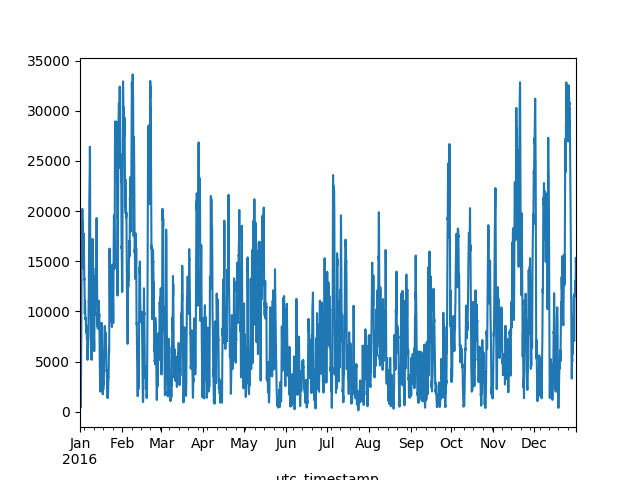

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [74]:
data_gen_2016.plot()


This is the data that we will try to predict. Now let's load in the weather data that we will use to predict it.

In [75]:
data_wind = pd.read_csv('weather_data_filtered.csv',
                       parse_dates=[0], index_col=0)

In [76]:
data_wind.head()

,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE11_windspeed_10m,DE11_temperature,DE11_radiation_direct_horizontal,DE11_radiation_diffuse_horizontal,DE12_windspeed_10m,DE12_temperature,...,DEE0_radiation_direct_horizontal,DEE0_radiation_diffuse_horizontal,DEF0_windspeed_10m,DEF0_temperature,DEF0_radiation_direct_horizontal,DEF0_radiation_diffuse_horizontal,DEG0_windspeed_10m,DEG0_temperature,DEG0_radiation_direct_horizontal,DEG0_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00+00:00,4.783100,-3.080,0.0,0.0,2.09,-7.32,0.0,0.0,1.54,-6.81,...,0.0,0.0,10.24,1.30,0.0,0.0,5.11,-5.28,0.0,0.0
2011-01-01 01:00:00+00:00,5.119786,-3.020,0.0,0.0,2.31,-7.46,0.0,0.0,1.85,-7.16,...,0.0,0.0,10.81,1.56,0.0,0.0,5.35,-5.02,0.0,0.0
2011-01-01 02:00:00+00:00,5.368643,-2.953,0.0,0.0,2.51,-7.51,0.0,0.0,2.14,-7.54,...,0.0,0.0,10.79,1.71,0.0,0.0,5.35,-4.85,0.0,0.0
2011-01-01 03:00:00+00:00,5.559722,-2.852,0.0,0.0,2.61,-7.43,0.0,0.0,2.33,-7.69,...,0.0,0.0,10.53,1.76,0.0,0.0,5.39,-4.69,0.0,0.0
2011-01-01 04:00:00+00:00,5.732672,-2.675,0.0,0.0,2.60,-7.20,0.0,0.0,2.41,-7.59,...,0.0,0.0,10.31,1.76,0.0,0.0,5.67,-4.38,0.0,0.0


In [77]:
data_wind.dtypes

DE_windspeed_10m                     float64
DE_temperature                       float64
DE_radiation_direct_horizontal       float64
DE_radiation_diffuse_horizontal      float64
DE11_windspeed_10m                   float64
DE11_temperature                     float64
DE11_radiation_direct_horizontal     float64
DE11_radiation_diffuse_horizontal    float64
DE12_windspeed_10m                   float64
DE12_temperature                     float64
DE12_radiation_direct_horizontal     float64
DE12_radiation_diffuse_horizontal    float64
DE13_windspeed_10m                   float64
DE13_temperature                     float64
DE13_radiation_direct_horizontal     float64
DE13_radiation_diffuse_horizontal    float64
DE14_windspeed_10m                   float64
DE14_temperature                     float64
DE14_radiation_direct_horizontal     float64
DE14_radiation_diffuse_horizontal    float64
DE21_windspeed_10m                   float64
DE21_temperature                     float64
DE21_radia

In [78]:
data_wind.describe()

,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE11_windspeed_10m,DE11_temperature,DE11_radiation_direct_horizontal,DE11_radiation_diffuse_horizontal,DE12_windspeed_10m,DE12_temperature,...,DEE0_radiation_direct_horizontal,DEE0_radiation_diffuse_horizontal,DEF0_windspeed_10m,DEF0_temperature,DEF0_radiation_direct_horizontal,DEF0_radiation_diffuse_horizontal,DEG0_windspeed_10m,DEG0_temperature,DEG0_radiation_direct_horizontal,DEG0_radiation_diffuse_horizontal
count,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,...,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000,52608.000000
mean,4.144236,9.360535,80.824628,68.121895,3.659597,9.419090,98.212834,60.205516,3.578676,10.050094,...,86.815029,60.375306,5.311089,9.182021,78.439860,58.935561,3.955682,8.673323,89.487627,60.304548
std,1.762177,7.916475,155.197688,90.624399,1.925087,8.439279,186.977671,83.174216,1.905403,8.456145,...,170.661137,83.171757,2.443987,7.031100,160.683198,81.865962,2.027340,8.419207,175.753578,83.330823
min,0.947210,-16.381000,0.000000,0.000000,0.300000,-17.830000,0.000000,0.000000,0.280000,-17.690000,...,0.000000,0.000000,0.330000,-13.870000,0.000000,0.000000,0.360000,-18.650000,0.000000,0.000000
25%,2.860085,3.098000,0.000000,0.000000,2.340000,2.790000,0.000000,0.000000,2.260000,3.390000,...,0.000000,0.000000,3.460000,3.810000,0.000000,0.000000,2.500000,2.050000,0.000000,0.000000
50%,3.744155,9.011500,0.412755,6.233714,3.220000,9.090000,0.300980,5.521560,3.120000,9.600000,...,0.238672,5.182495,5.000000,9.020000,0.168074,4.798028,3.470000,8.210000,0.238371,5.218414
75%,5.017195,15.365250,78.048465,121.455767,4.560000,15.690000,94.042313,99.731661,4.510000,16.260000,...,74.216650,102.056269,6.780000,14.610000,56.663527,100.303843,5.020000,14.940000,75.649038,101.219157
max,15.523697,34.298000,836.811807,393.525587,16.400000,36.970000,873.520646,413.415015,15.550000,38.700000,...,850.831274,409.437842,20.330000,29.980000,826.042447,383.386833,15.230000,36.040000,851.573265,399.830719


Now lets take the weather data for just 2016 and store it into a variable.

In [79]:
data_wind_2016 = data_wind.loc['20160101':'20170101']

The data set has wind, temperature, and sunshine measurements for all of germany in the first four columns, and measurements of the same quantities by region in the rest of the columns. Let's start out by doing what analysis we can using the first four columns to predict wind power generation. First lets plot each of these first four columns.

<IPython.core.display.Javascript object>


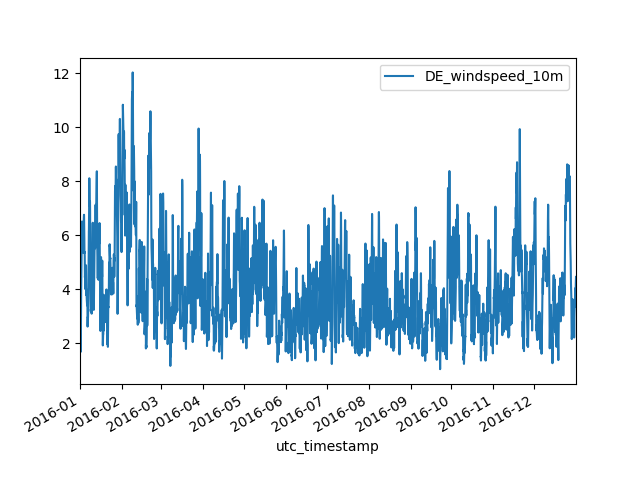

<IPython.core.display.Javascript object>


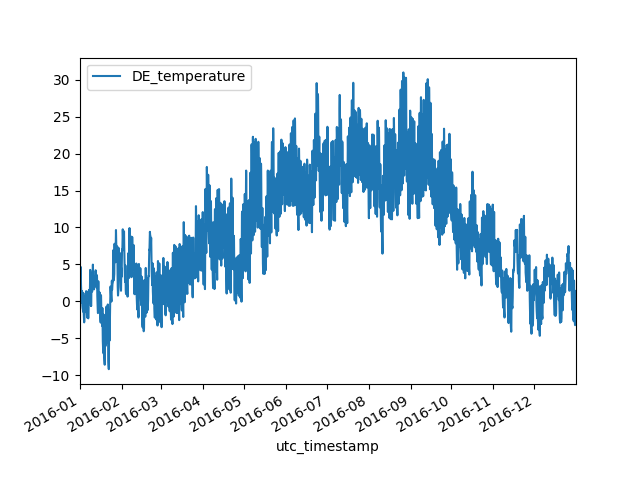

<IPython.core.display.Javascript object>


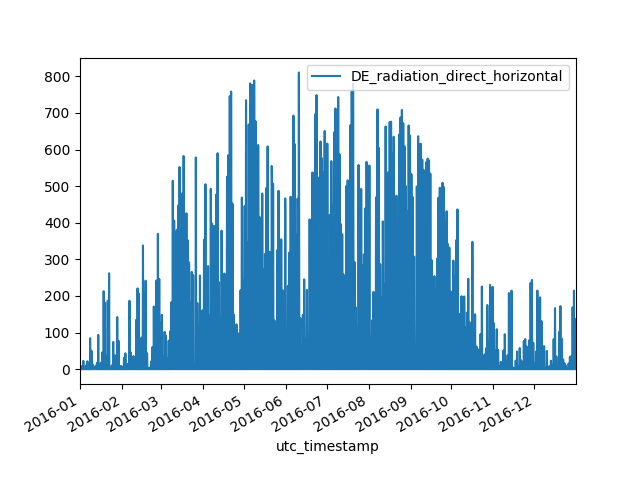

<IPython.core.display.Javascript object>


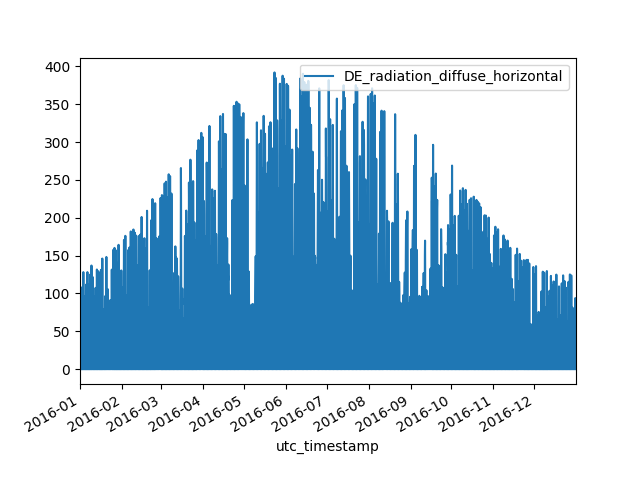

In [80]:
data_wind_2016.plot(y='DE_windspeed_10m')
data_wind_2016.plot(y='DE_temperature')
data_wind_2016.plot(y='DE_radiation_direct_horizontal')
data_wind_2016.plot(y='DE_radiation_diffuse_horizontal')

Now lets make a plot with DE_windspeed_10m on the x-axis and wind generation on the y-axis. Unfortunately we can't just go ahead and plot these datasets against each other, since there are different rows of missing data in each dataset as well as some duplicated rows.

First, lets figure out how to get a list of the hours for which we have data for each data set.

In [81]:
data_wind_2016.index

DatetimeIndex(['2016-01-01 00:00:00+00:00', '2016-01-01 01:00:00+00:00',
               '2016-01-01 02:00:00+00:00', '2016-01-01 03:00:00+00:00',
               '2016-01-01 04:00:00+00:00', '2016-01-01 05:00:00+00:00',
               '2016-01-01 06:00:00+00:00', '2016-01-01 07:00:00+00:00',
               '2016-01-01 08:00:00+00:00', '2016-01-01 09:00:00+00:00',
               ...
               '2016-12-31 14:00:00+00:00', '2016-12-31 15:00:00+00:00',
               '2016-12-31 16:00:00+00:00', '2016-12-31 17:00:00+00:00',
               '2016-12-31 18:00:00+00:00', '2016-12-31 19:00:00+00:00',
               '2016-12-31 20:00:00+00:00', '2016-12-31 21:00:00+00:00',
               '2016-12-31 22:00:00+00:00', '2016-12-31 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='utc_timestamp', length=8784, freq=None)

In [82]:
data_gen_2016.index

DatetimeIndex(['2016-01-01 00:00:00+00:00', '2016-01-01 01:00:00+00:00',
               '2016-01-01 02:00:00+00:00', '2016-01-01 03:00:00+00:00',
               '2016-01-01 04:00:00+00:00', '2016-01-01 05:00:00+00:00',
               '2016-01-01 06:00:00+00:00', '2016-01-01 07:00:00+00:00',
               '2016-01-01 08:00:00+00:00', '2016-01-01 09:00:00+00:00',
               ...
               '2016-12-31 13:00:00+00:00', '2016-12-31 14:00:00+00:00',
               '2016-12-31 15:00:00+00:00', '2016-12-31 16:00:00+00:00',
               '2016-12-31 17:00:00+00:00', '2016-12-31 18:00:00+00:00',
               '2016-12-31 19:00:00+00:00', '2016-12-31 20:00:00+00:00',
               '2016-12-31 21:00:00+00:00', '2016-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='utc_timestamp', length=8783, freq=None)

First let's remove duplicated rows. Hint, you can use .index.duplicated() to get duplicated rows.

In [83]:
data_wind_2016 = data_wind_2016[data_wind_2016.index.duplicated() == False]

Next lets merge the two dataframes with an inner join. An 'inner' join means that we are matching up rows from the same hour with each other, and when there is data missing in one of the dataframes for that hour, we just ignore that hour entirely.

You can find the syntax [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html). Scroll down until you get to the inner join part.

In [84]:
data_2016 = pd.concat([data_wind_2016, data_gen_2016], axis=1, join='inner')

<IPython.core.display.Javascript object>


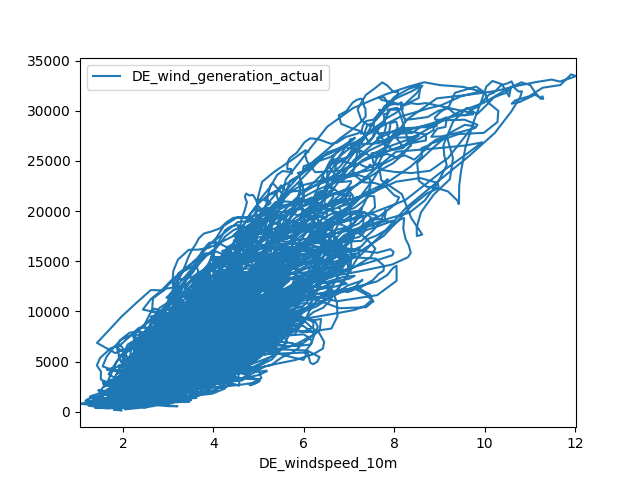

In [85]:
data_2016.plot(x='DE_windspeed_10m', y='DE_wind_generation_actual')

<IPython.core.display.Javascript object>


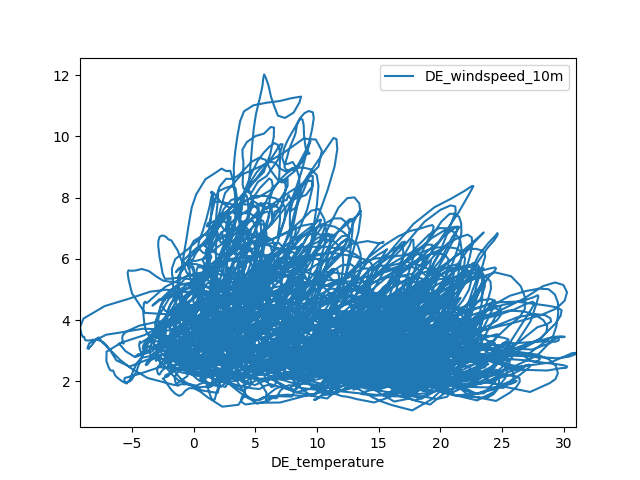

In [86]:
data_2016.plot(x='DE_temperature', y='DE_windspeed_10m')

<IPython.core.display.Javascript object>


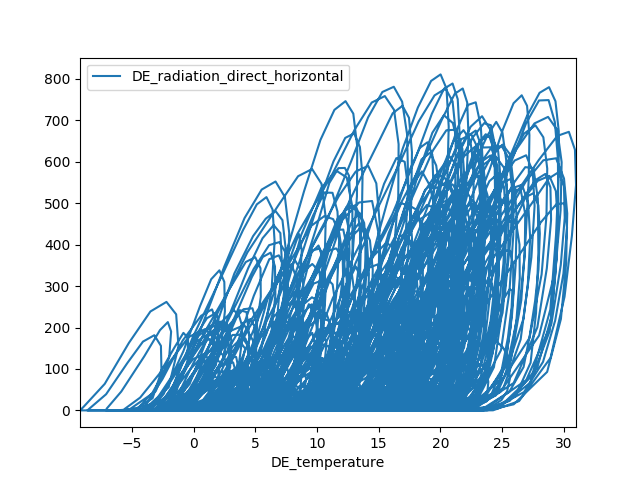

In [87]:
data_2016.plot(x='DE_temperature', y='DE_radiation_direct_horizontal')

<IPython.core.display.Javascript object>


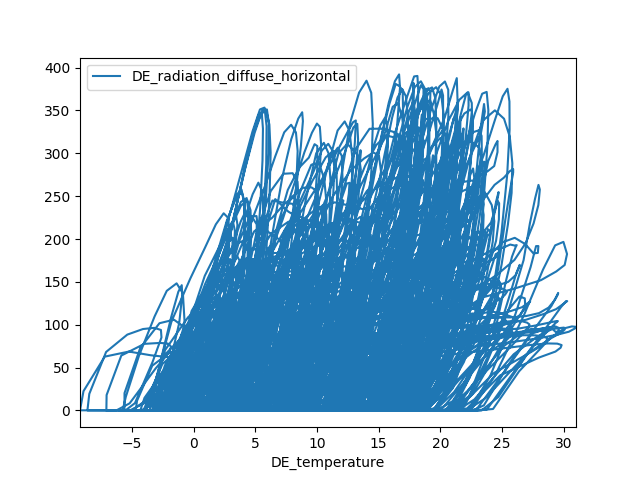

In [88]:
data_2016.plot(x='DE_temperature', y='DE_radiation_diffuse_horizontal')

There are other columns in the data, but for now let's just try to predict the windspeed based on these four columns. We will split our dataset up into a training dataset for the start of the year, and a testing dataset for the second half of the year.

Lets create four arrays, train_x, train_y, test_x, and test_y. The train/test_x arrays should have two columns, for windspeed and temperature. The train/test_y arrays should have one column which has the wind generation.

In [89]:
train_x = data_2016.loc['20160101':'20160630',('DE_windspeed_10m','DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal')]
train_y = data_2016.loc['20160101':'20160630','DE_wind_generation_actual']
test_x = data_2016.loc['20160630':'20170101',('DE_windspeed_10m','DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal')]
test_y = data_2016.loc['20160630':'20170101','DE_wind_generation_actual']

Now lets normalize the data and fit a linear model using sklearn LinearRegression (google for it!)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x2 = scaler.fit_transform(train_x)
test_x2 = scaler.transform(test_x)

scalar_out = StandardScaler()
train_y2 = scaler.fit_transform(np.matrix(train_y).reshape(-1, 1))
test_y2 = scaler.transform(np.matrix(test_y).reshape(-1,1))

print(test_x.head())

                           DE_windspeed_10m  DE_temperature  \
utc_timestamp                                                 
2016-06-30 00:00:00+00:00          2.159503          15.276   
2016-06-30 01:00:00+00:00          2.420423          14.895   
2016-06-30 02:00:00+00:00          2.661281          14.597   
2016-06-30 03:00:00+00:00          2.768291          14.356   
2016-06-30 04:00:00+00:00          2.865079          14.345   

                           DE_radiation_direct_horizontal  \
utc_timestamp                                               
2016-06-30 00:00:00+00:00                        0.000000   
2016-06-30 01:00:00+00:00                        0.000000   
2016-06-30 02:00:00+00:00                        0.000000   
2016-06-30 03:00:00+00:00                        0.002026   
2016-06-30 04:00:00+00:00                        0.648443   

                           DE_radiation_diffuse_horizontal  
utc_timestamp                                               
2016-06-

In [91]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(train_x2, train_y2)


Print out the score of the model. It should be around 0.78. Also, make a plot of the model's output vs the actual wind generation.

Since model.predict() returns a numpy array instead of a pandas dataframe, we will have to use matplotlib (plt) functions to plot what we want to plot this time.

0.7666458026518886


<IPython.core.display.Javascript object>


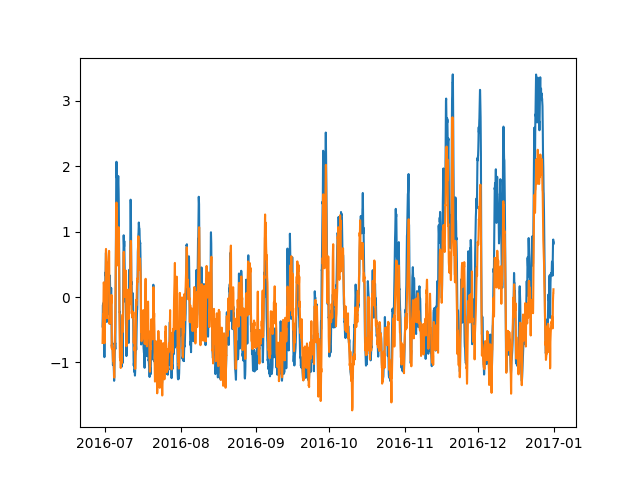

In [92]:
print(model.score(test_x2, test_y2))
plt.figure()
pred_y = model.predict(test_x2)
plt.plot(test_y.index, test_y2)
plt.plot(test_y.index, pred_y)

We can get an idea of how important each of the four input columns are by looking at the coefficients assigned to them by the linear regression. Note that this only really works well because we scaled our input data.

In [93]:
model.coef_

array([[ 0.9277828 ,  0.13320117, -0.10143127, -0.25101823]])

We can see that the windspeed is the most important factor and this should match our intuition from the correlation plots we made earlier.

Since we know that windspeed is the most important factor, let's try training a model using only the windspeed.

In [94]:
model2 = LinearRegression().fit(train_x2[:,0].reshape(-1,1), train_y2)
model2.score(test_x2[:,0].reshape(-1,1), test_y2)

0.6788738825852578

Unfortunately this doesn't work quite as well as the previous model. I guess the other factors are also useful.

## Extra Challenge

1) Try to use your trained model on other years of data. Does it still work as well?

2) Try to predict the energy generated from solar panels using the same datasets.